In [1]:
#Para conseguir un dataset con una dimensión reducidad, aplica la técnica de Selección de variables basada en árbol de decisión mediante 
#las importancias de cada variable (Decision Trees Importances):

#Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.
#random_state=100
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor


In [3]:
import pandas as pd

# Cargar las primeras 100 líneas del archivo

df = pd.read_csv("covtype.data", nrows=1000)
df.to_csv("covtypeI.data", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'Ejercicio/covtype.data'

In [ ]:
datos = pd.read_csv("covtypeI.data")

In [ ]:
columnas_Wilderness_Area = ["Wilderness_Area" + str(i) for i in range(1, 5)]
columnas_Soil_Type = ["Soil_Type" + str(i) for i in range(1, 41)]
columnas_restantes = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
"Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon",
"Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
columna_ultima = ["Cover_Type"]
columnas_final = columnas_restantes + columnas_Wilderness_Area + columnas_Soil_Type + columna_ultima

In [ ]:
datos.columns = columnas_final

In [ ]:
#EJERCICIO 1
X = datos.drop('Cover_Type', axis=1)
y = datos['Cover_Type']

In [ ]:
#Crear un modelo de árbol de decisión y ajustarlo a los datos:
tree_model = DecisionTreeRegressor(random_state=100)
tree_model.fit(X, y)

DecisionTreeRegressor(random_state=100)

In [ ]:
#Obtener las importancias de las variables:
importances = pd.Series(tree_model.feature_importances_, index=X.columns)

In [ ]:
#Ordenar las importancias de las variables de mayor a menor:
sorted_importances = importances.sort_values(ascending=False)

In [ ]:
#Calcular la suma acumulada de las importancias y el porcentaje que representa cada variable:
cumulative_importances = sorted_importances.cumsum()
cumulative_importances_percent = 100*cumulative_importances/cumulative_importances[-1]

In [ ]:
#Seleccionar las variables que aglutinan hasta el 95% de la información requerida:
selected_variables = cumulative_importances_percent[cumulative_importances_percent <= 95].index
selected_variables = selected_variables.append(pd.Index(["Cover_Type"]))

print(selected_variables)

Index(['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Hillshade_9am', 'Soil_Type12',
       'Horizontal_Distance_To_Hydrology', 'Soil_Type20', 'Hillshade_3pm',
       'Cover_Type'],
      dtype='object')


In [ ]:
datos_1 = datos[selected_variables]
print(datos_1)

     Elevation  Horizontal_Distance_To_Roadways  \
0         2590                              390   
1         2804                             3180   
2         2785                             3090   
3         2595                              391   
4         2579                               67   
..         ...                              ...   
995       3032                             4710   
996       2896                             3294   
997       2846                             3056   
998       2995                             4472   
999       2795                             2280   

     Horizontal_Distance_To_Fire_Points  Hillshade_9am  Soil_Type12  \
0                                  6225            220            0   
1                                  6121            234            1   
2                                  6211            238            0   
3                                  6172            220            0   
4                               

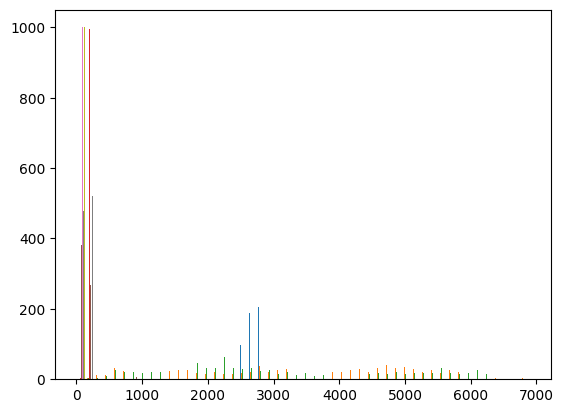

In [ ]:
#EJERCICIO2

# Generar histograma de todas las variables
plt.hist(datos_1.values, bins=50)
plt.show()


In [ ]:
# Obtener las columnas que se van a normalizar
cols_to_normalize = datos_1.columns[:-1]

# Normalizar los valores de las columnas
datos_1[cols_to_normalize] = (datos_1[cols_to_normalize] - datos_1[cols_to_normalize].min()) / (datos_1[cols_to_normalize].max() - datos_1[cols_to_normalize].min())

# Restar 1 del valor de la columna 'Cover_Type'
datos_1['Cover_Type'] -= 1


C:\Users\smite\AppData\Local\Temp\ipykernel_4488\3532958195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_1[cols_to_normalize] = (datos_1[cols_to_normalize] - datos_1[cols_to_normalize].min()) / (datos_1[cols_to_normalize].max() - datos_1[cols_to_normalize].min())
C:\Users\smite\AppData\Local\Temp\ipykernel_4488\3532958195.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_1['Cover_Type'] -= 1


In [ ]:
datos_norm = datos_1.copy()

In [ ]:
#EJERCICIO3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(datos_norm.iloc[:, :-1], datos_norm.iloc[:, -1], test_size=0.2, random_state=100)

# entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=100)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=100)

In [ ]:
# predecir en datos de test y calcular métricas de evaluación
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)
matrix = confusion_matrix(y_test, y_pred)

# imprimir resultados
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification report:\n", report)
print("Confusion matrix:\n", matrix)

Accuracy: 0.745
F1-score: 0.7333161764705882
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.50      0.62        42
           1       0.76      0.89      0.82       125
           4       0.63      0.52      0.57        33

    accuracy                           0.74       200
   macro avg       0.73      0.63      0.67       200
weighted avg       0.75      0.74      0.73       200

Confusion matrix:
 [[ 21  20   1]
 [  5 111   9]
 [  0  16  17]]


In [ ]:
#EJERCICIO 4

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Instanciar el modelo de árbol de decisión
tree = DecisionTreeClassifier(random_state=100)

# Separar los datos en conjuntos de entrenamiento y prueba


# Entrenar el modelo en los datos de entrenamiento
tree.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = tree.predict(X_test)

In [ ]:
# Calcular las métricas de evaluación del modelo
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
report = classification_report(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de evaluación del modelo
print("Accuracy:", acc)
print("F1-score (weighted):", f1)
print("Classification report:\n", report)
print("Confusion matrix:\n", cm)


Accuracy: 0.76
F1-score (weighted): 0.763042812268075
Classification report:
               precision    recall  f1-score   support

           0       0.53      0.60      0.56        42
           1       0.83      0.82      0.82       125
           4       0.83      0.76      0.79        33

    accuracy                           0.76       200
   macro avg       0.73      0.72      0.73       200
weighted avg       0.77      0.76      0.76       200

Confusion matrix:
 [[ 25  16   1]
 [ 19 102   4]
 [  3   5  25]]


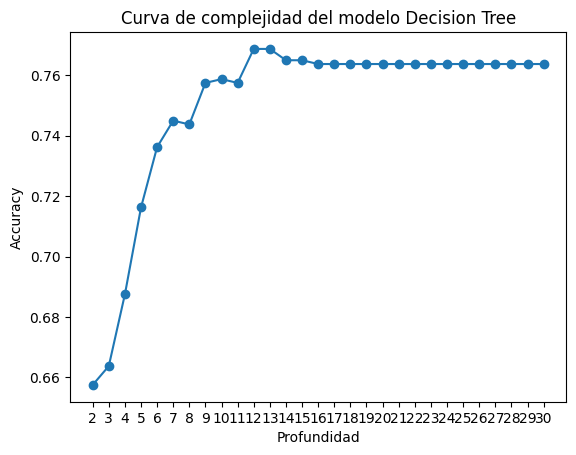

El valor óptimo de la profundidad del árbol es: 12


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir rango de profundidades
depths = range(2, 31)

# Crear modelo Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=100)

# Definir parámetros de GridSearchCV
param_grid = {'max_depth': depths}

# Realizar GridSearchCV
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Guardar resultados de GridSearchCV
results = grid_search.cv_results_

# Obtener los valores de los parámetros y el score
params = results['params']
scores = results['mean_test_score']

# Crear gráfica de curva de complejidad
plt.plot(depths, scores, '-o')
plt.xlabel('Profundidad')
plt.ylabel('Accuracy')
plt.title('Curva de complejidad del modelo Decision Tree')
plt.xticks(depths)
plt.show()

# Obtener mejor valor de profundidad del árbol
best_depth = grid_search.best_params_['max_depth']
print('El valor óptimo de la profundidad del árbol es:', best_depth)

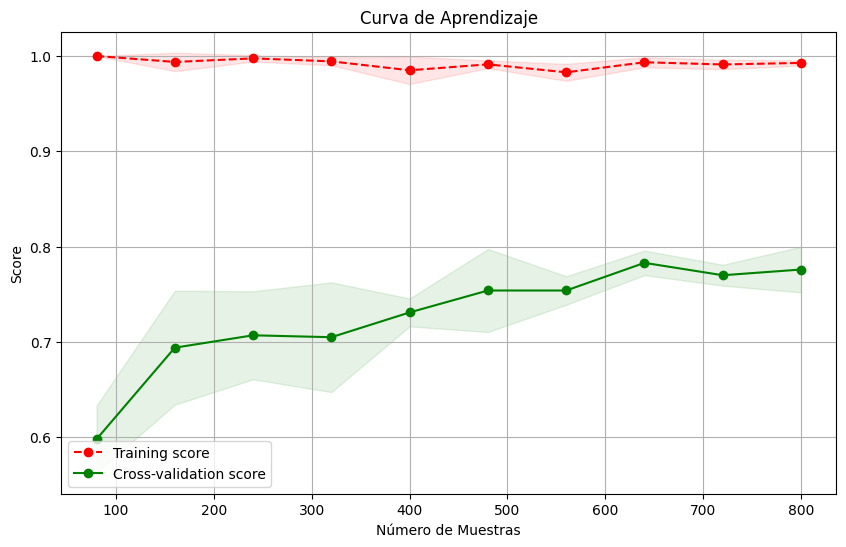

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(.1, 1.0, 10)):
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Número de Muestras")
    plt.ylabel("Score")
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    plt.legend(loc="best")
    plt.show()
    
# Generamos la curva de aprendizaje para el modelo Decision Tree Classifier con profundidad óptima
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=100)
dtc = DecisionTreeClassifier(max_depth=12, random_state=100)
plot_learning_curve(dtc, X, y, cv)

In [ ]:
#EJERCICIO5
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento del modelo
rfc = RandomForestClassifier(random_state=100, oob_score=True)
rfc.fit(X_train, y_train)

# Evaluación del modelo
y_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_f1 = f1_score(y_test, y_pred, average='weighted')
rfc_report = classification_report(y_test, y_pred, zero_division=0)
rfc_cm = confusion_matrix(y_test, y_pred)
rfc_oob = rfc.oob_score_

In [ ]:
tree_depths = [estimator.tree_.max_depth for estimator in rfc.estimators_]
median_tree_depth = np.median(tree_depths)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Definición de los rangos para cada hiperparámetro
n_estimators_range = [200, 300, 400]
max_depth_range = [20, 30, None]
max_features_range = ["auto", "log2", None]

# Definición de los parámetros a evaluar en GridSearchCV
params_grid = {
    "n_estimators": n_estimators_range,
    "max_depth": max_depth_range,
    "max_features": max_features_range
}
rfc = RandomForestClassifier(n_estimators=350, max_depth=22, max_features='auto', random_state=100, oob_score=True)
# Creación del modelo con GridSearchCV y evaluación
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
rfc_opt = GridSearchCV(RandomForestClassifier(oob_score=True, random_state=100), params_grid, scoring='accuracy', cv=cv, n_jobs=-1)

rfc_opt.fit(X_train, y_train)

# Evaluación del modelo óptimo
y_pred = rfc_opt.predict(X_test)

rfc_opt_accuracy = accuracy_score(y_test, y_pred)
rfc_opt_f1 = f1_score(y_test, y_pred, average='weighted')
rfc_opt_report = classification_report(y_test, y_pred, zero_division=0)
rfc_opt_cm = confusion_matrix(y_test, y_pred)
rfc_opt_oob = rfc_opt.best_estimator_.oob_score_

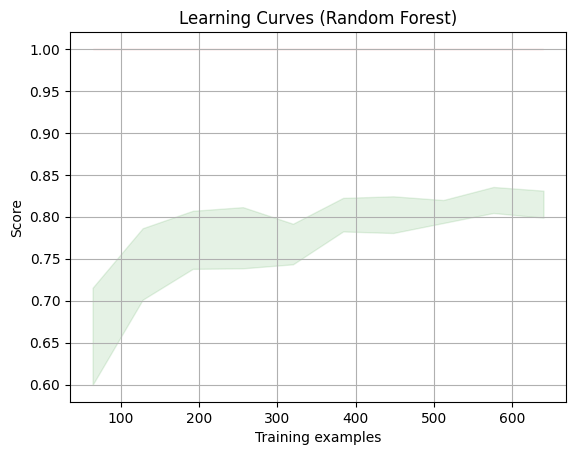

In [ ]:
from sklearn.model_selection import learning_curve

# Definición de la función para obtener la gráfica del Learning Curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
title = "Learning Curves (Random Forest)"
plot_learning_curve(RandomForestClassifier(n_estimators=350, max_depth=22, max_features='auto', random_state=100), title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()

In [ ]:
# Importar las librerías necesarias
#import xgboost as xgb
#from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# Crear el modelo
#xgb_clf = xgb.XGBClassifier(random_state=100)

# Entrenar el modelo
#xgb_clf.fit(X_train, y_train)

# Realizar las predicciones
#y_pred = xgb_clf.predict(X_test)

# Calcular las métricas de evaluación
#xgb_accuracy = accuracy_score(y_test, y_pred)
#xgb_f1 = f1_score(y_test, y_pred, average='weighted')
#xgb_report = classification_report(y_test, y_pred, zero_division=0)
#xgb_cm = confusion_matrix(y_test, y_pred)


In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Rangos de los hiperparámetros
# n_estimators_range = np.arange(100, 501, 100)
# max_depth_range = np.arange(6, 21, 2)
# learning_rate_range = [0.01, 0.1, 0.3, 0.5]

# # Definición de los parámetros a evaluar en GridSearchCV
# params_grid = {
#     "n_estimators": n_estimators_range,
#     "max_depth": max_depth_range,
#     "learning_rate": learning_rate_range
# }

# # Creación del modelo con GridSearchCV y evaluación
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
# xgb_opt = GridSearchCV(xgb.XGBClassifier(random_state=100), params_grid, scoring='accuracy', cv=cv, n_jobs=-1)
# xgb_opt.fit(X_train, y_train)

# # Evaluación del modelo óptimo
# y_pred = xgb_opt.predict(X_test)

# xgb_opt_accuracy = accuracy_score(y_test, y_pred)
# xgb_opt_f1 = f1_score(y_test, y_pred, average='weighted')
# xgb_opt_report = classification_report(y_test, y_pred, zero_division=0)
# xgb_opt_cm = confusion_matrix(y_test, y_pred)

In [ ]:
#EJERCICIO 7
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(type(model).__name__)
    print("Accuracy: {:.4f}".format(acc))
    print("F1-score: {:.4f}".format(f1))
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)


GaussianNB
Accuracy: 0.3700
F1-score: 0.3759
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.14      0.22        42
           1       0.95      0.28      0.43       125
           4       0.22      1.00      0.36        33

    accuracy                           0.37       200
   macro avg       0.55      0.47      0.34       200
weighted avg       0.73      0.37      0.38       200

Confusion Matrix:
 [[ 6  2 34]
 [ 6 35 84]
 [ 0  0 33]]
MultinomialNB
Accuracy: 0.6250
F1-score: 0.4808
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.62      1.00      0.77       125
           4       0.00      0.00      0.00        33

    accuracy                           0.62       200
   macro avg       0.21      0.33      0.26       200
weighted avg       0.39      0.62      0.48       200

Confusion Matrix:
 [[  0  42   0]
 [  0 1

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

models = [GaussianNB(), MultinomialNB(), ComplementNB(), BernoulliNB()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred, zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(type(model).__name__)
    print("Accuracy: {:.4f}".format(acc))
    print("F1-score: {:.4f}".format(f1))
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)

GaussianNB
Accuracy: 0.3700
F1-score: 0.3759
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.14      0.22        42
           1       0.95      0.28      0.43       125
           4       0.22      1.00      0.36        33

    accuracy                           0.37       200
   macro avg       0.55      0.47      0.34       200
weighted avg       0.73      0.37      0.38       200

Confusion Matrix:
 [[ 6  2 34]
 [ 6 35 84]
 [ 0  0 33]]
MultinomialNB
Accuracy: 0.6250
F1-score: 0.4808
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.62      1.00      0.77       125
           4       0.00      0.00      0.00        33

    accuracy                           0.62       200
   macro avg       0.21      0.33      0.26       200
weighted avg       0.39      0.62      0.48       200

Confusion Matrix:
 [[  0  42   0]
 [  0 1

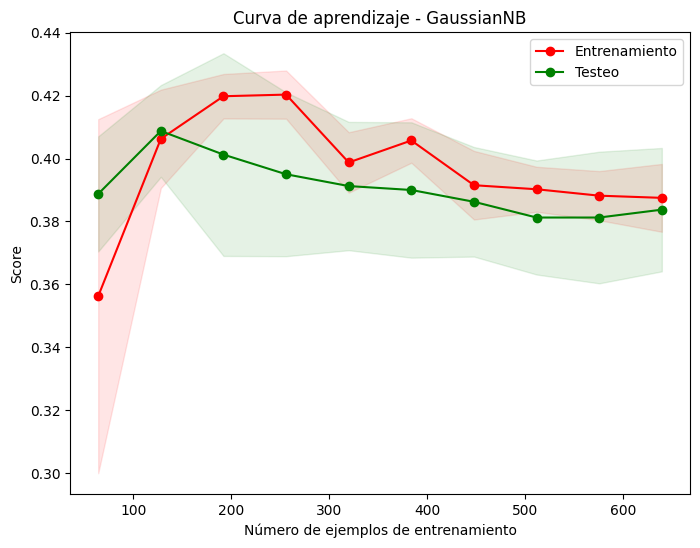

In [ ]:
from sklearn.model_selection import learning_curve

# Define el modelo GaussianNB
model_gnb = GaussianNB()

# Calcula la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model_gnb, X_train, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=100)

# Calcula las medias y desviaciones estándar de los scores de entrenamiento y testeo
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Grafica los resultados
plt.figure(figsize=(8, 6))
plt.title('Curva de aprendizaje - GaussianNB')
plt.xlabel('Número de ejemplos de entrenamiento')
plt.ylabel('Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Entrenamiento')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Testeo')
plt.legend(loc='best')
plt.show()


In [ ]:
#EJERCICIO 8
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# K-Nearest Neighbors con hiperparámetros por defecto
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred = knn_default.predict(X_test)


# K-Nearest Neighbors con 1 vecino
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
y_pred = knn_1.predict(X_test)


# K-Nearest Neighbors con 100 vecinos
knn_100 = KNeighborsClassifier(n_neighbors=100)
knn_100.fit(X_train, y_train)
y_pred = knn_100.predict(X_test)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


def plot_learning_curve_knn(model, X, y, n_neighbors, cv):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                            scoring='f1_weighted')
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.title(f"Learning Curve (KNN with n_neighbors={n_neighbors})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


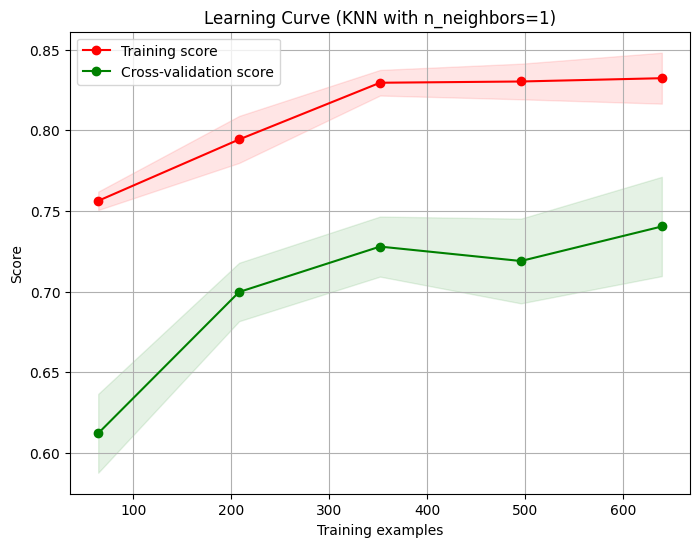

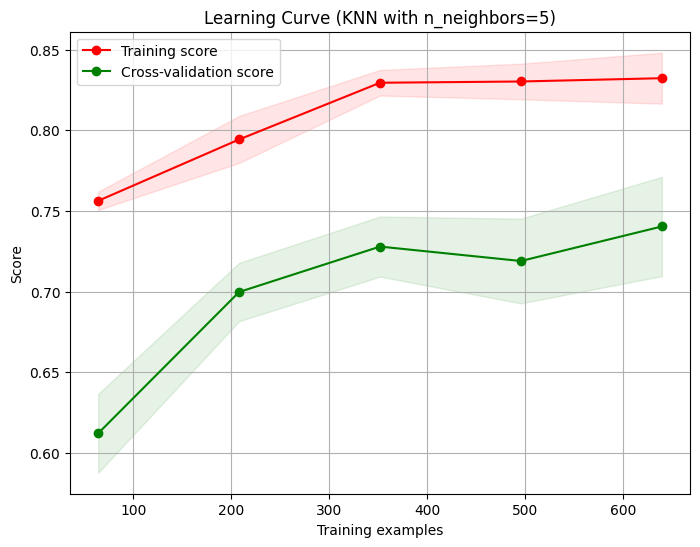

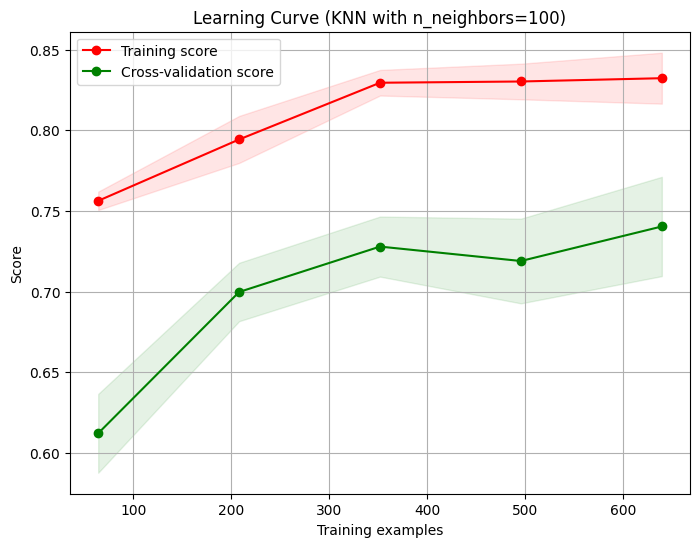

In [ ]:

model_knn = KNeighborsClassifier()
plot_learning_curve_knn(model_knn, X_train, y_train, 1, cv=5)
plot_learning_curve_knn(model_knn, X_train, y_train, 5, cv=5)
plot_learning_curve_knn(model_knn, X_train, y_train, 100, cv=5)

In [ ]:
#EJERCICIO 9
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Entrenar MLPClassifier con configuración por defecto
model_mlp1 = MLPClassifier(random_state=100)
model_mlp1.fit(X_train, y_train)

# Evaluar modelo
y_pred = model_mlp1.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
clf_report = classification_report(y_test, y_pred, zero_division=0)

print("MLPClassifier con configuración por defecto:")
print(f"Accuracy: {acc}")
print(f"F1-score (weighted): {f1}")
print("Classification report:")
print(clf_report)

# Entrenar MLPClassifier con hiperparámetros definidos
model_mlp2 = MLPClassifier(random_state=100, hidden_layer_sizes=(100,200,100), max_iter=10000, alpha=1e-5, tol=1e-5)
model_mlp2.fit(X_train, y_train)

# Evaluar modelo
y_pred = model_mlp2.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
clf_report = classification_report(y_test, y_pred, zero_division=0)

print("\nMLPClassifier con hiperparámetros definidos:")
print(f"Accuracy: {acc}")
print(f"F1-score (weighted): {f1}")
print("Classification report:")
print(clf_report)


C:\Users\smite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier con configuración por defecto:
Accuracy: 0.745
F1-score (weighted): 0.7415636832553542
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.52      0.62        42
           1       0.79      0.82      0.80       125
           4       0.60      0.73      0.66        33

    accuracy                           0.74       200
   macro avg       0.71      0.69      0.69       200
weighted avg       0.75      0.74      0.74       200


MLPClassifier con hiperparámetros definidos:
Accuracy: 0.845
F1-score (weighted): 0.8337840256544112
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.50      0.64        42
           1       0.84      0.94      0.88       125
           4       0.86      0.94      0.90        33

    accuracy                           0.84       200
   macro avg       0.86      0.79      0.81       200
weighted avg       0.85      0.84      0.83 